# Linear Regression From Scratch
In this notebook you will implement linear regression using the least squares method.

The notebook will guide you in the general steps. You may use only numpy, pandas, and matplotlib for this exercise.

#### Math Background
The task is to solve linear regression for the data set of ```x``` and ```y```. That is, fit a line y to the data such that ```y = a + bx + e```. Where a and b are coefficents and e is an error term.

We know that ```b = SUM ( xi - x_mean) * (yi - y_mean) / SUM (xi - x_mean)^2``` where ```xi```, and ```yi``` are the indivdual observations and ```x_mean```, ```y_mean``` are means of all ```xi``` and ```yi```.

So a reasonable solution then for a fit is ```a = y_mean - b * x_mean```.


#### Implementation Steps
1. Load the file ```reg_data.csv```
2. Display the data with a scatter plot. Write a markdown cell and comment on the structure of the data and what kind of line you think will fit the data. 
3. Implement a function of the least squares method.
4. Plot the predictions from your function.
5. Comment on the output of your function. Does it make sense? Can it be made better? If yes, how?

In [1]:
#import the minimum packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load and inspect the data
data = pd.read_csv('ai-f20-m3/d6_linear_regression/reg_data.csv', header=None, names=['X','Y'])
data



,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925
...,...,...
95,50.030174,81.536991
96,49.239765,72.111832
97,50.039576,85.232007
98,48.149859,66.224958


In [62]:
data["X2"] = data.X.apply(lambda x:(x**2))
data['XY'] = data['X'] * data['Y']
data


,X,Y,X2,XY
0,32.502345,31.707006,1056.402448,1030.552051
1,53.426804,68.777596,2854.423389,3674.567142
2,61.530358,62.562382,3785.984959,3849.485782
3,47.475640,71.546632,2253.936359,3396.722129
4,59.813208,87.230925,3577.619836,5217.561458
...,...,...,...,...
95,50.030174,81.536991,2503.018345,4079.309864
96,49.239765,72.111832,2424.554491,3550.769709
97,50.039576,85.232007,2503.959160,4264.973504
98,48.149859,66.224958,2318.408911,3188.722377


In [61]:
#plot the data

# plt.plot(data.X,(Result[1] * data.X + Result[2]))

#implement a least squares function to find a, b
#plot the regression line as x and y
#plot the original data with the regression line as defined by your function

In [59]:
## Function to choose two columns for least squares 

# enter dataframe, and column names 

def LeastSquares(df,X,Y):

    
    # slice dataframe after input of desired X and Y variables 

    tempdf = df[[X, Y]]
    
    # add columns 

    tempdf['X2'] = tempdf[X].apply(lambda x:(x**2))
    tempdf['XY'] = tempdf[X] * tempdf[Y]

    # build variables 
   
    x_mean = tempdf.X.mean()
    y_mean = tempdf.Y.mean()
    x_sum = tempdf.X.sum()
    y_sum = tempdf.Y.sum()
    x2_sum = tempdf.X2.sum()
    xy_sum = tempdf.XY.sum()
    
    # find slop of regression line 
    # y = mx + b ----> m, slope and b, y-intercept

    N = len(tempdf.X)
    m = (N * xy_sum - x_sum * y_sum)/(N * x2_sum - (x_sum ** 2))
    b = (y_sum - m * x_sum)/ N


    # return Dataframe and info ...needs to be an array
    Result = [tempdf, m, b, x_sum, y_sum, x2_sum, xy_sum, x_mean, y_mean]
    print(Result[1:])

    #plot the data
    plt.style.use('seaborn-whitegrid')
    plt.scatter(data.X, data.Y)
    plt.plot(data.X,(m * data.X + b), color='r')
    return Result


[1.3224310227553593, 7.99102098227042, 4895.834146155935, 7273.505055368646, 249096.1189080058, 368535.1486795527, 48.95834146155935, 72.73505055368646]
/home/gyasis/anaconda3/envs/datasci/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


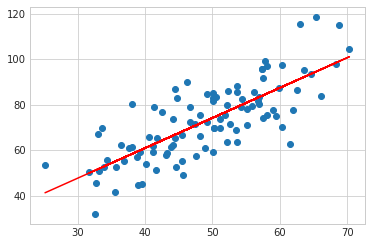

In [60]:

Result = LeastSquares(data,'X','Y')